## Stock Price Analysis and Prediction.

I am following a youtube tutorial for my first attempt. I plan to use this info and guide to learn what I can and apply these concepts to future predictions of stocks and finance related materials.

The link to the video is here https://www.youtube.com/watch?v=QIUxPv5PJOY

In [3]:
import pandas as pd
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [4]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01',end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.817261
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,274.498535
2019-12-16,280.790009,276.980011,277.000000,279.859985,32046500.0,279.197357


In [5]:
#get number of rows and cols
df.shape

(2004, 6)

<function matplotlib.pyplot.show(*args, **kw)>

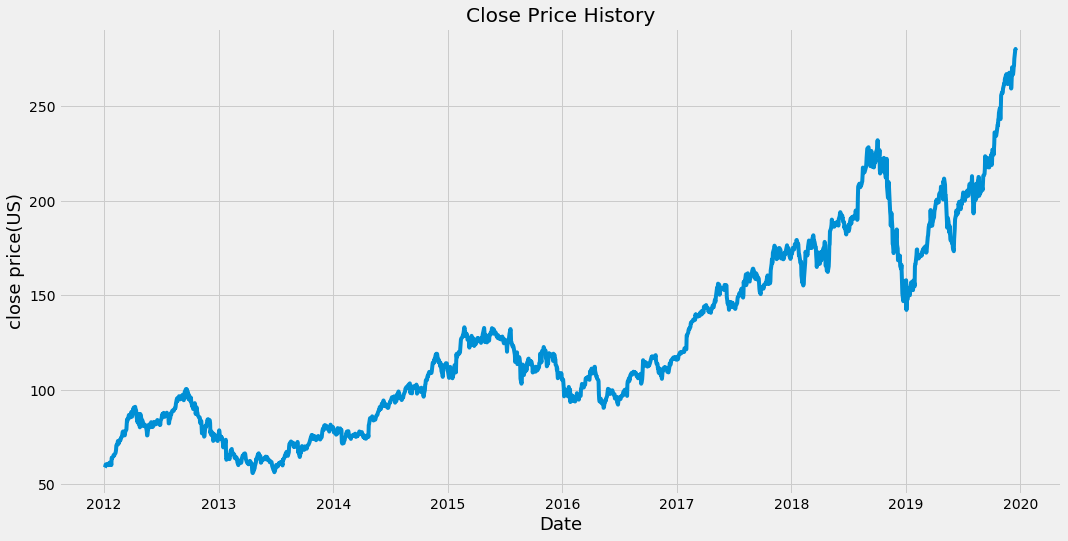

In [8]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("close price(US)", fontsize = 18)
plt.show

In [9]:
# df with only close col
dataC = df.filter(["Close"])

# now its a numpy array
dataset = dataC.values

#get num rows to train on 80%
training_data_len = math.ceil(len(dataset)*.8)
print(training_data_len)

1604


In [11]:
# scale the data with a scaler
# helps with model training
# already knew this but its good to note
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.99755134],
       [1.        ],
       [0.99701712]])

In [13]:
#Create train and test set
train_data = scaled_data[0:training_data_len,:]
#split into xtrain and ytrain
#iv
xtrain = []
#dv
ytrain = []
for i in range(60,len(train_data)):
    xtrain.append(train_data[i-60:i,0])
    ytrain.append(train_data[i,0])

In [15]:
#convert xtrain and ytrain into numpy arrays

xtrain,ytrain = np.array(xtrain), np.array(ytrain)

#reshape data
# because a lstm network expects it to be 3 dimentional and now its 2 dimentional
print(xtrain.shape)
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [17]:
#build lstm model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(xtrain.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
#compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
#train the model
model.fit(xtrain,ytrain, batch_size = 1, epochs = 1)

Epoch 1/1
1544/1544 [==============================] - 77s 50ms/step - loss: 8.3487e-04


In [20]:
#Create testing dataset
#index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the datasets xtest and ytest
xtest = []
ytest = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    xtest.append(test_data[i-60:i, 0])

In [22]:
#make it a np array
xtest = np.array(xtest)

In [23]:
#reshape into 3 dimensions
# number of rows, number of columns, number of features
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1],1))

In [26]:
#get predicted price values
predictions = model.predict(xtest)
#unscaling the values
predictions = scaler.inverse_transform(predictions)

In [27]:
#get root mean squared error
# measures accuracy 
# lower the better

rmse = np.sqrt(np.mean(predictions - ytest)**2)
rmse

1.1781580352783203

__main__:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


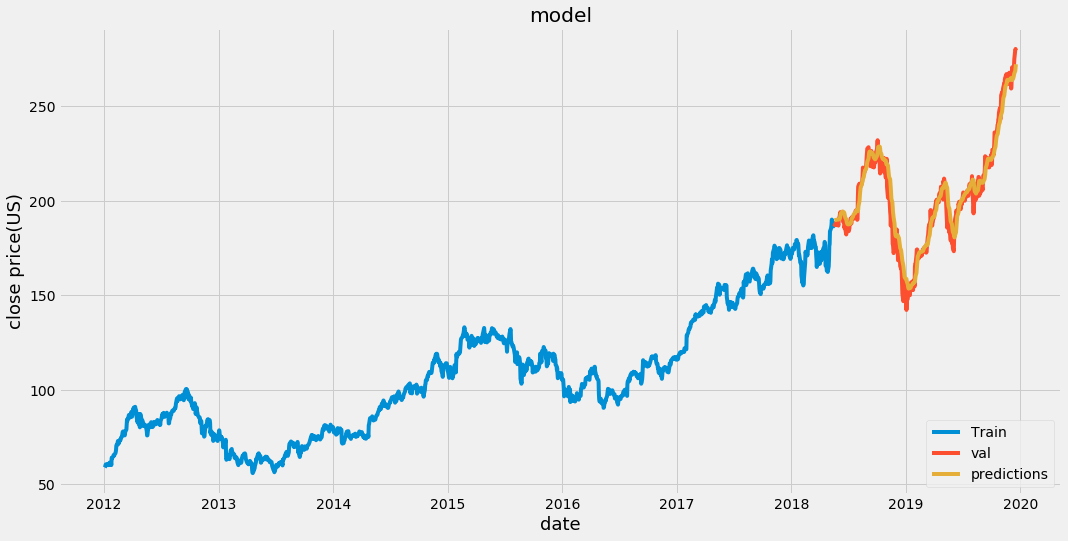

In [29]:
# plot the data

train = dataC[0:training_data_len]
valid = dataC[training_data_len:]
valid["Predictions"] = predictions

#visualize data
plt.figure(figsize = (16,8))
plt.title("model")
plt.xlabel("date", fontsize = 18)
plt.ylabel("close price(US)", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train","val","predictions"], loc = "lower right")
plt.show()

In [30]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-18,186.309998,189.697968
2018-05-21,187.630005,189.765167
2018-05-22,187.160004,189.812271
2018-05-23,188.360001,189.787262
2018-05-24,188.149994,189.858368
...,...,...
2019-12-12,271.459991,266.582886
2019-12-13,275.149994,267.493439
2019-12-16,279.859985,268.733307


In [31]:
# predict a new day

apple_quote = web.DataReader("AAPL", data_source="yahoo", start = "2012-01-01", end = "2019-12-17")

#new df
newdf = apple_quote.filter(["Close"])

last_60_days = newdf[-60:].values

#scale the data
l_60_d_scaled = scaler.transform(last_60_days)

#create an empty list
X_test = []
X_test.append(l_60_d_scaled)

X_test = np.array(X_test)

#reshape
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

#get predicted scaled price
pred_price = model.predict(X_test)

#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[273.9309]]


In [32]:
apple_quote2 = web.DataReader("AAPL",data_source = "yahoo", start = "2019-12-18", end = "2019-12-18")

print(apple_quote2["Close"])

Date
2019-12-18    279.739990
2019-12-19    280.019989
Name: Close, dtype: float64


## thoughts

- i want to get the accuracy score
- i want to make a function that takes the data in, scales it, and transforms it to where it needs to be to fit into the lstm model
- i would like to make another feature called positive that is 1 if the stock went up that day. then mabye predict something with that... i believe it may be helpful in predicting if an option would be profitable or not.
- also add a percent certianty to it 